In [1]:
#from collections import defaultdict
#import array
#import csv
import numpy as np
#from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
#import itertools
import pandas as pd

In [2]:
dbb = pd.read_csv("time_fixed_DB.csv", encoding="UTF-8",sep=";")
dff= pd.read_csv("time_fixed_DF.csv", encoding="UTF-8",sep=";")

In [3]:
db = dbb
df = dff.loc[(dff["userId"] > 100) & (dff["userId"] < 200)]


In [4]:
# print(df.shape)
# print(db.shape)

In [5]:
# R = {}
R_data = []

weight = 1/np.log10(dff.loc[:,"movieId"].value_counts())

#db = dbb.loc[dbb.loc[:,"userId"] < 100]
for NF_user in df.loc[:,"userId"].unique():
    tmp1 = df.loc[df.loc[:,"userId"] == NF_user].set_index(["movieId"])
#     D = {}
    for ML_user in db.loc[:,"userId"].unique():
        tmp2 = db.loc[db.loc[:,"userId"] == ML_user].set_index(["movieId"])
        #com_movieId = pd.Series(list(set(tmp1.loc[:,"movieId"]).intersection(set(tmp2.loc[:,"movieId"]))))
        com_movieId = tmp1.index.intersection(tmp2.index)
        R_data.append({'uNF' : NF_user, 'uML': ML_user, 'score':sum(weight.loc[com_movieId] *\
        (np.exp(-np.abs(tmp1.loc[com_movieId, "rating"] - tmp2.loc[com_movieId, "rating"])/1.5) + \
        np.exp(-np.abs(tmp1.loc[com_movieId, "timestamp"] - tmp2.loc[com_movieId, "timestamp"])/30)))})
R=pd.DataFrame(R_data)       

User ID is 199
No match :( 0.7317303312406386


User ID is 116
No match :( 0.6481944155590866


User ID is 168
No match :( 0.0641164661646585


User ID is 183
No match :( 0.13753644463026027


User ID is 188
Match with an eccentricity of 2.100440280524868


User ID is 134
Match with an eccentricity of 2.765501109039099


User ID is 195
No match :( 0.2286262809434065




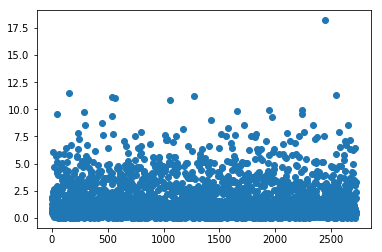

User ID is 164
Match with an eccentricity of 3.801854884084289


User ID is 131
Match with an eccentricity of 1.7878314389757128


User ID is 169
No match :( 0.6133276336162781


User ID is 178
No match :( 0.6545884257049602


User ID is 192
No match :( 1.3331898950171968


User ID is 126
Match with an eccentricity of 2.2249115947184053


User ID is 158
No match :( 0.100849082517319


User ID is 177
No match :( 0.4188998102550965


User ID is 142
No match :( 1.416609127292679


User ID is 149
No match :( 0.46759233227644553


User ID is 130
Match with an eccentricity of 2.1299398550931716


User ID is 189
No match :( 0.22362749111091432


User ID is 133
No match :( 0.07256220706073227




In [12]:
values = R["uNF"].unique()
# print(R.head)
#x = range(1,101)

#print(len(R))
#weight = df["movieId"].value_counts()
#print(com_movieId)
#tmp1 = tmp1.set_index(['movieId'])
#print(tmp1  tmp1.loc[tmp1.index.isin(com_movieId)])
#print(tmp1.loc[tmp1["movieId"].isin(com_movieId)])
#print(tmp2.loc[tmp2["movieId"].isin(com_movieId)])
#print(tmp1.loc[tmp1["movieId"].isin(com_movieId),"rating"])
#print(tmp1.loc[tmp1["movieId"].isin(com_movieId),"rating"] + tmp2.loc[tmp2["movieId"].isin(com_movieId),"rating"])
#R[59,1] 25 8 97
for elem in values:
    tempUser = R[R["uNF"]==elem]
    if elem == 164:
        plt.scatter(range(len(tempUser)),tempUser["score"])
        plt.show()
    tempScore = np.array(tempUser["score"])
    stdev = np.std(tempScore)
    best1 = np.max(tempScore)
    idx1 = np.argmax(tempScore)
    tempScore = np.delete(tempScore, idx1)
    # print(tempUser)
    best2 = np.max(tempScore)
    ecc = (best1-best2)/stdev
    print("User ID is", elem)
    if (ecc >= 1.5):
        print("Match with an eccentricity of", ecc)
    else:
        print("No match :(", ecc)
    print("\n")
    


In [ ]:
# x = [5,1,7,0,3,4,5,3,2,6,7,3,6]
# get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
# print(get_indexes(7,x))
# stupidMatrix = [ [0,1,2], [3,3,0], [0,0,1]];
# stupidMatrix2 = [ [0,2,0], [1,1,1], [1,0,5]];
# print(stupidMatrix)
# print(stupidMatrix2)


In [ ]:
# get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

# p0=1.5
# d0=30 # empirical values
# auxData = np.array(stupidMatrix) #auxData will be loaded
# rData = np.array(stupidMatrix2) #rData will be loaded
# rMax=3 # load a number here from rData
# auxMax=3 # load a number here from auxData

# for r in range(rMax): # user from netflix
#     for aux in range(auxMax): # user from movieLens
#         ## Method1
# #         temp_r_vector = rData[r,:] > 0
# #         temp_aux_vector = auxData[aux,:] > 0
# #         temp_shared = np.logical_and(temp_aux_vector,temp_r_vector) 
# #         print(temp_shared)
# #         indOf1 = get_indexes(1,temp_shared)
# #         print(indOf1)
        
#         ## Method2, this might be faster than Method1
#         temp_shared = np.multiply(rData[r,:],auxData[aux,:]) > 0
#         indOf1 = get_indexes(1,temp_shared)
#         print(temp_shared)
#         print(indOf1)

#         #indOf1= get_indexes(1, np.logical_and(temp_aux_vector,temp_r_vector)  ) # will switch to this line after debugging is finished

#         #eccentritiy = sum(exp(( rData(indOf1(1:2:len(indOf1)-1))-auxData(indOf1(1:2:len(indOf1)-1)) )/p0) + exp(( rData(indOf1(2:2:len(indOf1)))-auxData(2:2:len(indOf1) )/d0)
#         #if eccentritiy > thetaAsThreshold
#             # we know this aux!